In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
TESS = "/content/drive/My Drive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/content/drive/My Drive/audio_speech_actors_01-24/"
SAVEEJE = "/content/drive/My Drive/AudioData/AudioData/JE/"
SAVEEDC = "/content/drive/My Drive/AudioData/AudioData/DC/"
SAVEEJK = "/content/drive/My Drive/AudioData/AudioData/JK/"
SAVEEKL = "/content/drive/My Drive/AudioData/AudioData/KL/"
CREMA = "/content/drive/My Drive/AudioWAV/"



In [ ]:
# Run one example 
dir_list = os.listdir(SAVEEJE)
dir_list[0:5]
# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='a':
        emotion.append('male_angry')
    elif i[-8:-6]=='d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='f':
        emotion.append('male_fear')
    elif i[-8:-6]=='h':
        emotion.append('male_happy')
    elif i[-8:-6]=='n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEEJE + i)
    
# Now check out the label count distribution 
SAVEE_dfje = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_dfje['source'] = 'SAVEEJE'
SAVEE_dfje = pd.concat([SAVEE_dfje, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_dfje.labels.value_counts()

male_neutral     30
male_disgust     15
male_fear        15
male_sad         15
male_surprise    15
male_angry       15
male_happy       15
Name: labels, dtype: int64

In [ ]:
# parse the filename to get the emotions
dir_list = os.listdir(SAVEEDC)
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='a':
        emotion.append('male_angry')
    elif i[-8:-6]=='d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='f':
        emotion.append('male_fear')
    elif i[-8:-6]=='h':
        emotion.append('male_happy')
    elif i[-8:-6]=='n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEEDC + i)
    
# Now check out the label count distribution 
SAVEE_dfdc = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_dfdc['source'] = 'SAVEEDC'
SAVEE_dfdc = pd.concat([SAVEE_dfdc, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_dfdc.labels.value_counts()

male_neutral     30
male_disgust     15
male_fear        15
male_sad         15
male_surprise    15
male_angry       15
male_happy       15
Name: labels, dtype: int64

In [ ]:
# parse the filename to get the emotions
dir_list = os.listdir(SAVEEJK)
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='a':
        emotion.append('male_angry')
    elif i[-8:-6]=='d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='f':
        emotion.append('male_fear')
    elif i[-8:-6]=='h':
        emotion.append('male_happy')
    elif i[-8:-6]=='n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEEJK + i)
    
# Now check out the label count distribution 
SAVEE_dfjk = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_dfjk['source'] = 'SAVEEJK'
SAVEE_dfjk = pd.concat([SAVEE_dfjk, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_dfjk.labels.value_counts()

male_neutral     30
male_disgust     15
male_fear        15
male_sad         15
male_surprise    15
male_angry       15
male_happy       15
Name: labels, dtype: int64

In [ ]:
# parse the filename to get the emotions
dir_list = os.listdir(SAVEEKL)
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='a':
        emotion.append('male_angry')
    elif i[-8:-6]=='d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='f':
        emotion.append('male_fear')
    elif i[-8:-6]=='h':
        emotion.append('male_happy')
    elif i[-8:-6]=='n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEEKL + i)
    
# Now check out the label count distribution 
SAVEE_dfkl = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_dfkl['source'] = 'SAVEEKL'
SAVEE_dfkl = pd.concat([SAVEE_dfkl, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_dfkl.labels.value_counts()

male_neutral     30
male_disgust     15
male_fear        15
male_sad         15
male_surprise    15
male_angry       15
male_happy       15
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
female_disgust      96
male_fear           96
female_angry        96
male_disgust        96
male_angry          96
female_happy        96
male_surprise       96
male_happy          96
female_sad          96
female_fear         96
male_sad            96
female_surprise     96
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_disgust     400
female_happy       400
female_neutral     400
female_angry       400
female_sad         400
female_fear        400
female_surprise    400
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(CREMA)
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()


male_happy        671
male_sad          671
male_disgust      671
male_fear         671
male_angry        671
female_happy      600
female_sad        600
female_fear       600
female_disgust    600
female_angry      600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [ ]:
df = pd.concat([SAVEE_dfje,SAVEE_dfdc,SAVEE_dfjk,SAVEE_dfkl, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_disgust     1096
female_angry       1096
female_happy       1096
female_sad         1096
female_fear        1096
female_neutral     1056
male_neutral        839
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
male_angry          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


In [ ]:
'''
1. Data Augmentation method   
'''
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

'''
2. Extracting the MFCC feature as an image (Matrix format).  
'''
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        # if aug == 1:
        #     data = speedNpitch(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=40)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X


'''
3. Confusion matrix plot 
'''        
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
'''
# 4. Create the 2D CNN model 
'''
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt = optimizers.Adam(0.001)
    #model.compile(optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

'''
# 5. Other functions 
'''
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches. 
    So instead of repeating the functions each time, we assign the results into on object with its associated variables 
    depending on each combination:
        1) MFCC with no augmentation  
        2) MFCC with augmentation 
        3) Logmelspec with no augmentation 
        4) Logmelspec with augmentation
    '''
    
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test             
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)
    
    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''
    
        preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        
        # print(accuracy_score(actual, preds))
        
        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique() 
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)


In [ ]:
ref = pd.read_csv("Data_path.csv")
ref.head()

NameError: ignored

In [ ]:
def noisy_signal(signal, snr_low=15, snr_high=30, nb_augmented=2):
    
    # Signal length
    signal_len = len(signal)

    # Generate White noise
    noise = np.random.normal(size=(nb_augmented, signal_len))
    
    # Compute signal and noise power
    s_power = np.sum((signal / (2.0 ** 15)) ** 2) / signal_len
    n_power = np.sum((noise / (2.0 ** 15)) ** 2, axis=1) / signal_len
    
    # Random SNR: Uniform [15, 30]
    snr = np.random.randint(snr_low, snr_high)
    
    # Compute K coeff for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- snr / 10))
    K = np.ones((signal_len, nb_augmented)) * K
    
    # Generate noisy signal
    return signal + K.T * noise

In [ ]:
sampling_rate=44100
audio_duration=2.5
n_melspec = 40
aug_specgram = prepare_data(ref,  n = n_melspec, aug = 1, mfcc = 1)

100%|██████████| 12162/12162 [50:20<00:00,  4.03it/s]


In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(aug_specgram
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )



# one hot encode the target 
lb = LabelEncoder()
#X_train = speedNpitch(X_train)
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# X_train = (X_train - mean)/std
# X_test = (X_test - mean)/std
from sklearn.preprocessing import StandardScaler
def fit_X_scaler(X_train):
    """fit StandardScaler，and return StandardScaler object
    """
    sc = StandardScaler()
    for _, clips in enumerate(X_train):
        data_i_truncated = np.squeeze(clips)
        sc.partial_fit(data_i_truncated)
    return sc

def get_X_scaled(X_train, scaler=None):
    """apply normlization
    """
    X_train_new = np.zeros(X_train.shape)
    for indx, clips in enumerate(X_train):
        data_i_truncated = np.squeeze(clips)
        if scaler is not None:  # normlize
            data_i_truncated = scaler.transform(data_i_truncated)
        X_train[indx, :, :, 0] = data_i_truncated
    return X_train

sc = fit_X_scaler(X_train)
X_train = get_X_scaled(X_train, sc)
X_test = get_X_scaled(X_test, sc)

# Build CNN model 
model = get_2d_conv_model(n=n_melspec)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=30)

NameError: ignored

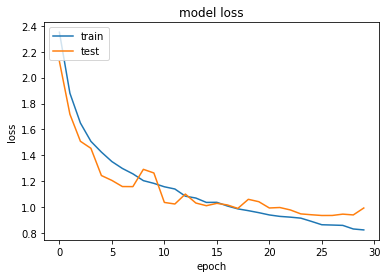

accuracy: 63.99%


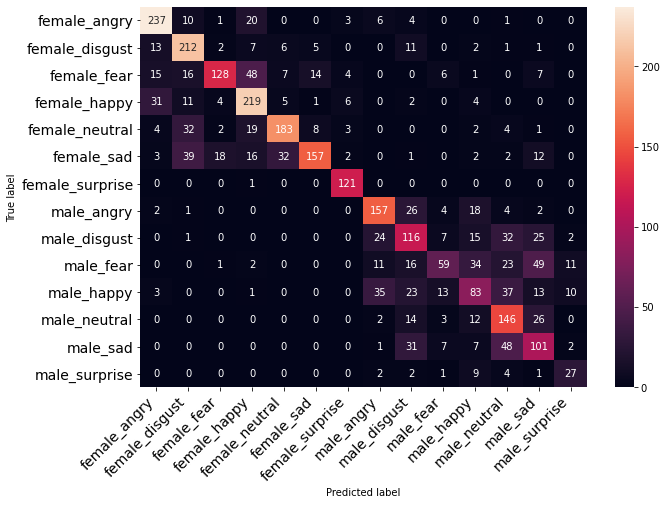

In [ ]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

In [ ]:
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

NameError: ignored

In [ ]:
preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

3041/3041 [==============================] - 38s 12ms/step


array([10,  3, 12, ...,  8,  4,  2])

In [ ]:
  # predictions 
  preds = preds.astype(int).flatten()
  preds = (lb.inverse_transform((preds)))
  preds = pd.DataFrame({'predictedvalues': preds})

  # Actual labels
  actual=y_test.argmax(axis=1)
  actual = actual.astype(int).flatten()
  actual = (lb.inverse_transform((actual)))
  actual = pd.DataFrame({'actualvalues': actual})

  # Lets combined both of them into a single dataframe
  finaldf = actual.join(preds)
  finaldf[170:180]

,actualvalues,predictedvalues
170,female_happy,male_happy
171,female_neutral,female_neutral
172,female_fear,female_disgust
173,female_disgust,female_disgust
174,male_disgust,male_fear
175,male_disgust,male_neutral
176,male_neutral,male_neutral
177,female_sad,female_sad
178,male_happy,male_angry
179,female_neutral,female_neutral


In [ ]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,308
female_disgust,322
female_fear,156
female_happy,333
female_neutral,233
female_sad,185
female_surprise,139
male_angry,238
male_disgust,246


0.6399210785925682


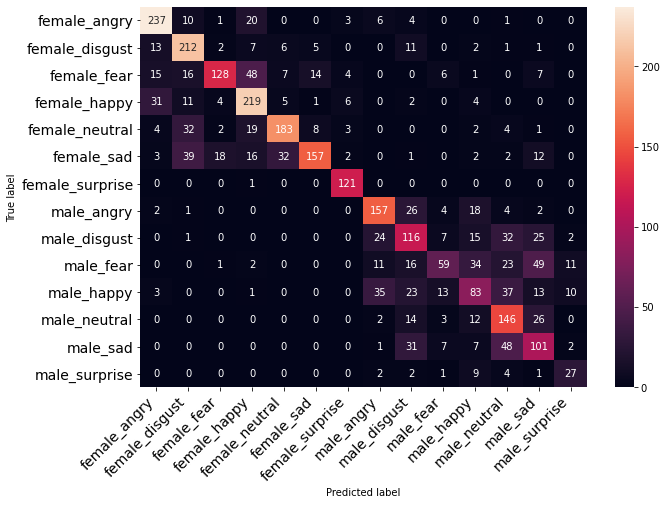

In [ ]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.77      0.84      0.80       282
 female_disgust       0.66      0.82      0.73       260
    female_fear       0.82      0.52      0.64       246
   female_happy       0.66      0.77      0.71       283
 female_neutral       0.79      0.71      0.75       258
     female_sad       0.85      0.55      0.67       284
female_surprise       0.87      0.99      0.93       122
     male_angry       0.66      0.73      0.69       214
   male_disgust       0.47      0.52      0.50       222
      male_fear       0.59      0.29      0.39       206
     male_happy       0.44      0.38      0.41       218
   male_neutral       0.48      0.72      0.58       203
       male_sad       0.42      0.51      0.46       197
  male_surprise       0.52      0.59      0.55        46

       accuracy                           0.64      3041
      macro avg       0.64      0.64      0.63      3041
   weighted avg       0.66   

In [ ]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
from tqdm import tqdm
import pickle
import IPython.display as ipd  

0.973364024991779


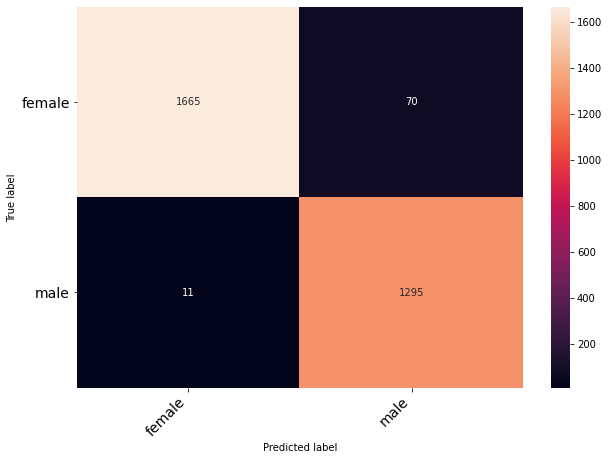

In [ ]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.99      0.96      0.98      1735
        male       0.95      0.99      0.97      1306

    accuracy                           0.97      3041
   macro avg       0.97      0.98      0.97      3041
weighted avg       0.97      0.97      0.97      3041



0.6557053600789214


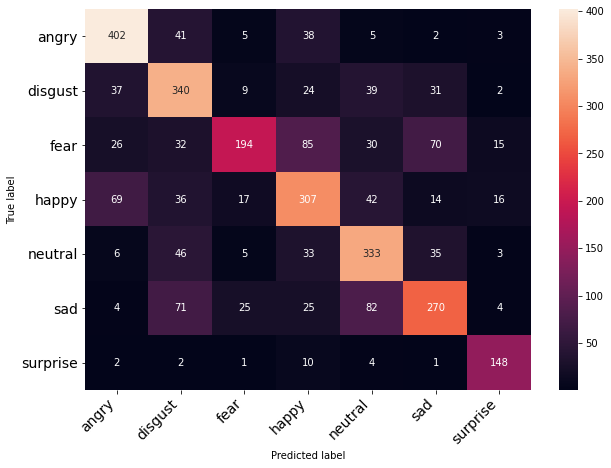

In [ ]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.74      0.81      0.77       496
     disgust       0.60      0.71      0.65       482
        fear       0.76      0.43      0.55       452
       happy       0.59      0.61      0.60       501
     neutral       0.62      0.72      0.67       461
         sad       0.64      0.56      0.60       481
    surprise       0.77      0.88      0.82       168

    accuracy                           0.66      3041
   macro avg       0.67      0.67      0.67      3041
weighted avg       0.66      0.66      0.65      3041



In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
score

3041/3041 [==============================] - 39s 13ms/step


[1.2598399596165686, 0.5475172400474548]

In [ ]:
# model.save('[2DCNNAlldata]M.h5')
# model.save_weights('[2DCNNAlldata]W.h5')
# model_name = 'Emotion_ModelLSTM.h5'
# save_dir = os.path.join(os.getcwd(), 'saved_models')

# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Save model and weights at %s ' % model_path)

# # Save the model to disk
# model_json = model.to_json()
# with open("model_json.json", "w") as json_file:
#     json_file.write(model_json)

In [ ]:
# # Split between train and test 
# X_train, X_test, y_train, y_test = train_test_split(aug_specgram
#                                                     , ref.labels
#                                                     , test_size=0.25
#                                                     , shuffle=True
#                                                     , random_state=42
#                                                    )

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , X_train.shape[2], X_train.shape[3], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , X_test.shape[2], X_test.shape[3], 1)

In [ ]:
# import os
# from glob import glob
# import pickle
# import itertools
# import numpy as np
# from scipy.stats import zscore
# from sklearn.model_selection import train_test_split

# ### Graph imports ###
# import matplotlib.pyplot as plt
# from PIL import Image
# import pandas as pd

# ### Audio import ###
# import librosa
# import IPython
# from IPython.display import Audio

# ### Plot imports ###
# from IPython.display import Image
# import matplotlib.pyplot as plt

# ### Time Distributed ConvNet imports ###
# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed, concatenate
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, LeakyReLU, Flatten
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras import backend as K
# from keras.utils import np_utils
# from keras.utils import plot_model
# from sklearn.preprocessing import LabelEncoder

# # Split between train and test 
# X_train, X_test, y_train, y_test = train_test_split(aug_specgram
#                                                     , ref.labels
#                                                     , test_size=0.25
#                                                     , shuffle=True
#                                                     , random_state=42
#                                                    )

# # one hot encode the target 
# lb = LabelEncoder()
# y_train = np_utils.to_categorical(lb.fit_transform(y_train))
# y_test = np_utils.to_categorical(lb.fit_transform(y_test))


# input_y = Input(shape=(X_train.shape[1:]), name='Input_MELSPECT')
# #input_y = Input(shape=(60,216,1), name='Input_MELSPECT')
# ## First LFLB (local feature learning block)
# y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_1_MELSPECT')(input_y)
# y = TimeDistributed(BatchNormalization(), name='BatchNorm_1_MELSPECT')(y)
# y = TimeDistributed(Activation('elu'), name='Activ_1_MELSPECT')(y)
# y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'), name='MaxPool_1_MELSPECT')(y)
# y = TimeDistributed(Dropout(0.2), name='Drop_1_MELSPECT')(y)     

# ## Second LFLB (local feature learning block)
# y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_2_MELSPECT')(y)
# y = TimeDistributed(BatchNormalization(), name='BatchNorm_2_MELSPECT')(y)
# y = TimeDistributed(Activation('elu'), name='Activ_2_MELSPECT')(y)
# y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_2_MELSPECT')(y)
# y = TimeDistributed(Dropout(0.2), name='Drop_2_MELSPECT')(y)

# ## Second LFLB (local feature learning block)
# y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_3_MELSPECT')(y)
# y = TimeDistributed(BatchNormalization(), name='BatchNorm_3_MELSPECT')(y)
# y = TimeDistributed(Activation('elu'), name='Activ_3_MELSPECT')(y)
# y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_3_MELSPECT')(y)
# y = TimeDistributed(Dropout(0.2), name='Drop_3_MELSPECT')(y)

# ## Second LFLB (local feature learning block)
# y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_4_MELSPECT')(y)
# y = TimeDistributed(BatchNormalization(), name='BatchNorm_4_MELSPECT')(y)
# y = TimeDistributed(Activation('elu'), name='Activ_4_MELSPECT')(y)
# y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_4_MELSPECT')(y)
# y = TimeDistributed(Dropout(0.2), name='Drop_4_MELSPECT')(y)  

# ## Flat
# y = TimeDistributed(Flatten(), name='Flat_MELSPECT')(y)                      
                               
# # Apply 2 LSTM layer and one FC
# y = LSTM(256, return_sequences=False, dropout=0.2, name='LSTM_1')(y)
# y = Dense(14, activation='softmax', name='FC')(y)

# # Build final model
# model = Model(inputs=input_y, outputs=y)


In [ ]:
# model.compile(optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])

# model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
#                     batch_size=16, verbose = 2, epochs=20)

In [ ]:
# score = model.evaluate(X_test, y_test, verbose=1)
# score